Credit: При подготовке ноутбука использовались материалы курса "Машинное обучение с подкреплением" Александра Панова и Андрея Городецкого.

##**Online** vs Offline Reinforcement Learning

Как собираются батчи для обучения?
1. Online RL: накапливает агент, взаимодействуя со средой
2. Offline RL: доступны из исторической выборки данных

<img src="https://offline-rl.github.io/assets/OFFLINE_RL.gif" width=500>

https://offline-rl.github.io

Рассмотренные ранее алгоритмы в основном рассчитаны на Online RL, семинар также посвящен этой области.

## OpenAI Gym / Farama Foundation Gymnasium

<small> _Интересно задать вопрос, почему же в течение двух тысяч лет людям не удалось отыскать законы механики, а вот появился Галилей, за
ним Ньютон и другие, и возникла механика? <...>
Нетрудно видеть, что основное, что мешало развитию механики (как и другим областям физики) — это отсутствие опытных
исследований и неумение понимать их значение и важность._

П. Л. Капица, лекция 1 на ФТФ МГУ, 1947 г.</small>

- Actor-critic - Р. Саттон, [1984](http://incompleteideas.net/papers/Sutton-PhD-thesis.pdf)
- TD($\lambda$) - Р. Саттон, [1988](http://incompleteideas.net/papers/sutton-88-with-erratum.pdf)
- Q-learning - К. Уоткинс, [1989](https://link.springer.com/content/pdf/10.1007/BF00992698.pdf)


- Google приобретает DeepMind - 2014

[Gym](https://gym.openai.com) — это набор инструментов для разработки и сравнения алгоритмов обучения с подкреплением, который также включает в себя большой [набор окружений](https://gym.openai.com/envs/).

[Gymnasium](https://gymnasium.farama.org/) — актуальный форк Gym'а. Имеет смысл по возможности использовать его. Но, т.к. большинство гайдов написаны под старую (pre- 0.21) версию Gym'а, то будьте готовы к [некоторым правкам кода](https://gymnasium.farama.org/content/migration-guide/).

Импортируем необходимые библиотеки и настраиваем визуализацию:

In [1]:
try:
    import google.colab
    COLAB = True
except ModuleNotFoundError:
    COLAB = False
    pass

if COLAB:
    !pip -q install "gymnasium[classic-control, atari, accept-rom-license]"
    !pip -q install piglet
    !pip -q install imageio_ffmpeg
    !pip -q install moviepy==1.0.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 23.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.5/67.5 kB 1.8 MB/s eta 0:00:00


In [2]:
import glob
import io
import base64
from IPython import display as ipythondisplay
from IPython.display import HTML
import matplotlib.pyplot as plt
%matplotlib inline

def show_video(folder="./video"):
    mp4list = glob.glob(folder + '/*.mp4')
    if len(mp4list) > 0:
        mp4 = sorted(mp4list, key=lambda x: x[-15:], reverse=True)[0]
        video = io.open(mp4, 'r+b').read()
        encoded = base64.b64encode(video)
        ipythondisplay.display(HTML(data='''<video alt="test" autoplay
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
    else:
        print("Could not find video")

In [3]:
import gymnasium as gym

# Создаем окружение
env = gym.make("MountainCar-v0")

# Инициализируем окружение
state, info = env.reset()
print(f"state: {state}")

# Выполняем действие в среде
next_state, r, terminated, truncated, info = env.step(0)
print(f"next_state: {next_state} , r: {r}, terminated: {terminated}, truncated: {truncated}, info: {info}")

# Закрываем окружение
env.close()

state: [-0.551779  0.      ]
next_state: [-0.55256784 -0.0007889 ] , r: -1.0, terminated: False, truncated: False, info: {}


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


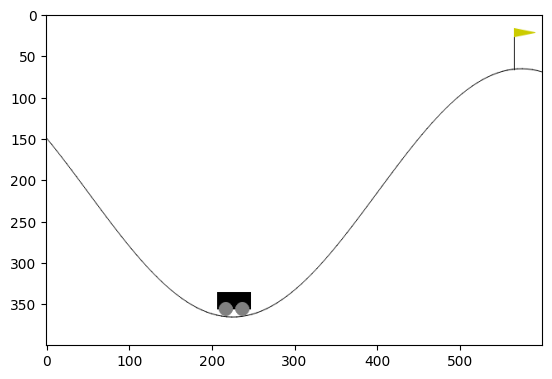

In [4]:
env = gym.make("MountainCar-v0", render_mode="rgb_array")
env.reset()
plt.imshow(env.render())

### Основные методы окружения:

* ``reset()`` $-$ инициализация окружения, возвращает первое наблюдение (состояние) и доп информацию.  
* ``step(a)`` $-$ выполнить в среде действие $\mathbf{a}$ и получить кортеж: $\mathbf{\langle s_{t+1}, r_t, terminated, truncated, info \rangle}$, где $\mathbf{s_{t+1}}$ - следующее состояние, $\mathbf{r_t}$ - вознаграждение, $\mathbf{terminated}$ - флаг заверешния эпизода, $\mathbf{truncated}$ — флаг завершения эпизода по step-лимиту, $\mathbf{info}$ - дополнительная информация

### Дополнительные методы:
* ``render()`` $-$ визуализация текущего состояния среды
* ``close()`` $-$ закрывает окружение


### Свойства среды:
* ``env.observation_space`` $-$ информация о пространстве состояний
* ``env.action_space`` $-$ информация о пространстве действий


In [5]:
print(f"env.observation_space: {env.observation_space}")
print(f"env.action_space: {env.action_space}")

env.observation_space: Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
env.action_space: Discrete(3)


### Среда ``MountainCar-v0``

Информацию о любой среде можно найти в [исходниках](https://github.com/Farama-Foundation/Gymnasium/blob/main/gymnasium/envs/classic_control/mountain_car.py) или на [сайте](https://gymnasium.farama.org/environments/classic_control/mountain_car_continuous/). О ``MountainCar-v0`` мы можем узнать следующее:

#### Задание:
Автомобиль едет по одномерному треку между двумя холмами. Цель состоит в том, чтобы заехать на правый холм; однако двигатель машины недостаточно мощный, чтобы взобраться на холм за один проход. Следовательно, единственный способ добиться успеха $-$ это двигаться вперед и назад, чтобы набрать обороты.

#### Пространство состояний Box(2):



Num | Observation  | Min  | Max  
----|--------------|------|----   
0   | position     | -1.2 | 0.6
1   | velocity     | -0.07| 0.07


#### Пространство действий Discrete(3):



Num | Action|
----|-------------|
0   | push left   |
1   | no push     |
2   | push right  |

* Вознаграждения: -1 за каждый шаг, пока не достигнута цель

* Начальное состояние: Случайная позиция от -0.6 до -0.4 с нулевой скоростью.

### Пример со случайной стратегией:

Для выбора действия используется ``env.action_space.sample()``

In [6]:
from gymnasium.wrappers.record_video import RecordVideo

# создаем окружение с ограничением на число шагов в среде
env = gym.make("MountainCar-v0", render_mode="rgb_array", max_episode_steps=250)
# добавляем визуализацию
env = RecordVideo(env, "./video")

# проводим инициализацию и запоминаем начальное состояние
s, _ = env.reset()
done = False

while not done:
    # выполняем действие, получаем s, r, done, info
    s, r, terminated, truncated, _ = env.step(env.action_space.sample())
    done = terminated or truncated

env.close()
show_video()

Moviepy - Building video /content/video/rl-video-episode-0.mp4.
Moviepy - Writing video /content/video/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-0.mp4


### Задание 1:
В среде MountainCar-v0 мы хотим, чтобы машина достигла флага. Давайте решим эту задачу, не используя обучение с подкреплением. Модифицируйте код функции ```act``` ниже для выполнения этого задания. Функция получает на вход состояние среды и должна вернуть действие.

In [7]:
def act(s):
    # список возможных действий
    left, stop, right = 0, 1, 2

    # позиция и скорость
    position, velocity = s
    ####### Здесь ваш код ########
    action = left if velocity < 0 else right
    ##############################
    return action

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
env = gym.make("MountainCar-v0", render_mode="rgb_array", max_episode_steps=250)
# добавляем визуализацию
env = RecordVideo(env, "./video")

# проводим инициализацию и запоминаем начальное состояние
s, _ = env.reset()
done = False

while not done:
    # выполняем действие, получаем s, r, done, info
    s, r, terminated, truncated, _ = env.step(act(s))
    done = terminated or truncated

if s[0] > 0.47:
    print("Принято!")
else:
    print("""Исправьте функцию выбора действия!""")


env.close()
show_video()

/usr/local/lib/python3.10/dist-packages/gymnasium/wrappers/record_video.py:94: UserWarning: WARN: Overwriting existing videos at /content/video folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Building video /content/video/rl-video-episode-0.mp4.
Moviepy - Writing video /content/video/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-0.mp4
Принято!


### Пример случайная стратегия в игре MsPacman

In [10]:
env = gym.make("MsPacman-v4", max_episode_steps=500, render_mode="rgb_array")
env = RecordVideo(env, "./video")

s, _ = env.reset()
done = False

while not done:
    s, r, terminated, truncated, _ = env.step(env.action_space.sample())
    done = terminated or truncated

env.close()
show_video()

/usr/local/lib/python3.10/dist-packages/gymnasium/wrappers/record_video.py:94: UserWarning: WARN: Overwriting existing videos at /content/video folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gymnasium/utils/passive_env_checker.py:335: UserWarning: WARN: No render fps was declared in the environment (env.metadata['render_fps'] is None or not defined), rendering may occur at inconsistent fps.
  logger.warn(


Moviepy - Building video /content/video/rl-video-episode-0.mp4.
Moviepy - Writing video /content/video/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-0.mp4


## Crossentropy Method

В этой пункте мы посмотрим на то, как решить задачи RL с помощью метода crossentropy.

Рассмотрим пример с задачей Taxi [Dietterich, 2000](https://arxiv.org/pdf/cs/9905014.pdf).

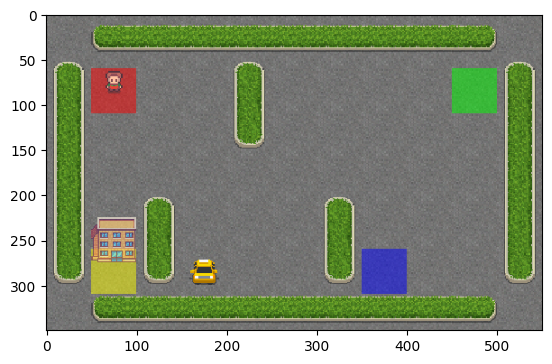

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import gymnasium as gym

env = gym.make("Taxi-v3", render_mode="rgb_array")
env.reset()
plt.imshow(env.render())

In [12]:
n_states  = env.observation_space.n
n_actions = env.action_space.n

print(f"состояний: {n_states} действий: {n_actions}")

состояний: 500 действий: 6


В этот раз нашей стратегией будет вероятностной распределение.

$\pi(s,a) = P(a|s)$

Для задачи такси мы можем использовать таблицу:

policy[s,a] = P(выбрать действие a | в состоянии s)

Создадим "равномерную" стратегию в виде двумерного массива с
равномерным распределением по действиям и сгенерируем игровую сессию с такой стратегией

In [13]:
def initialize_policy(n_states, n_actions):
    ####### Здесь ваш код ########
    policy = np.ones([n_states, n_actions]) * 1 / n_actions
    ##############################
    return policy

policy = initialize_policy(n_states, n_actions)

In [14]:
assert type(policy) in (np.ndarray, np.matrix)
assert np.allclose(policy, 1./n_actions)
assert np.allclose(np.sum(policy, axis=1), 1)

### Генерация сессий взаимодейтсвия со средой.

Мы будем запоминать все состояния, действия и вознаграждения за эпизод.

In [15]:
def generate_session(env, policy, t_max=10**4):
    """
    Игра идет до конца эпизода или до t_max шагов в окружении.
    :param policy: [n_states,n_actions]
    :returns: states - список состояний, actions - список действий, session_return - итоговая отдача
    """
    states, actions = [], []
    session_return = 0.

    s, info = env.reset()

    for t in range(t_max):
        # Подсказка: вы можете использовать `np.random.choice` для сэмплирования
        ####### Здесь ваш код ########
        a = np.random.choice(env.action_space.n, p=policy[s])
        ##############################
        new_s, r, terminated, truncated, info = env.step(a)

        # Записываем информацию, который мы получили от среды.
        states.append(s)
        actions.append(a)
        session_return += r

        s = new_s
        if terminated or truncated:
            break

    return states, actions, session_return

In [16]:
s, a, r = generate_session(env, policy)
assert type(s) == type(a) == list
assert len(s) == len(a)
assert isinstance(r, float)

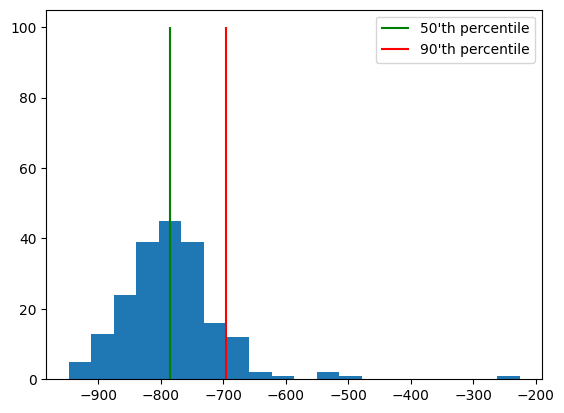

In [17]:
# посмотрим на изначальное распределение вознаграждения
import matplotlib.pyplot as plt
%matplotlib inline

sample_returns = [generate_session(env, policy, t_max=1000)[-1] for _ in range(200)]

plt.hist(sample_returns, bins=20)
plt.vlines([np.percentile(sample_returns, 50)], [0], [100], label="50'th percentile", color='green')
plt.vlines([np.percentile(sample_returns, 90)], [0], [100], label="90'th percentile", color='red')
plt.legend()

### Реализация метода crossentropy  

Наша задача - выделить лучшие действия и состояния, т.е. такие, при которых было лучшая отдача:

In [18]:
def select_elites(states_batch, actions_batch,
                  returns_batch, percentile=50):
    """
    Выбирает состояния и действия с заданным перцентилем (rewards >= percentile)
    :param states_batch: list of lists of states, states_batch[session_i][t]
    :param actions_batch: list of lists of actions, actions_batch[session_i][t]
    :param rewards_batch: list of session returns, returns_batch[session_i]

    :returns: elite_states, elite_actions - одномерные
    списки состояния и действия, выбранных сессий
    """
    assert len(states_batch) == len(actions_batch) == len(returns_batch), "Wrong input shapes."
    # нужно найти порог вознаграждения по процентилю
    ####### Здесь ваш код ########
    return_threshold = np.percentile(returns_batch, percentile)
    ##############################


    # в соответствии с найденным порогом - заполнить списки
    # elite_states и elite_actions, нужными состояниями и действиями
    elite_states = []
    elite_actions = []
    ####### Здесь ваш код ########
    for s, a, r in zip(states_batch, actions_batch, returns_batch):
        if r >= return_threshold:
            elite_states += s
            elite_actions += a
    ##############################

    return elite_states, elite_actions

In [19]:
states_batch = [
    [1, 2, 3],     # game1
    [4, 2, 0, 2],  # game2
    [3, 1],        # game3
]

actions_batch = [
    [0, 2, 4],     # game1
    [3, 2, 0, 1],  # game2
    [3, 3],        # game3
]
returns_batch = [
    3,  # game1
    4,  # game2
    5,  # game3
]

test_result_0 = select_elites(states_batch, actions_batch, returns_batch, percentile=0)
test_result_30 = select_elites(states_batch, actions_batch, returns_batch, percentile=30)
test_result_90 = select_elites(states_batch, actions_batch, returns_batch, percentile=90)
test_result_100 = select_elites(states_batch, actions_batch, returns_batch, percentile=100)

assert np.all(
    test_result_0[0] == [1, 2, 3, 4, 2, 0, 2, 3, 1]) \
       and np.all(
    test_result_0[1] == [0, 2, 4, 3, 2, 0, 1, 3, 3]), \
    "Для процентиля 0 необходимо выбрать все состояния " \
    "и действия в хронологическом порядке"

assert np.all(test_result_30[0] == [4, 2, 0, 2, 3, 1])\
   and np.all(test_result_30[1] == [3, 2, 0, 1, 3, 3]), \
    "Для процентиля 30 необходимо выбрать " \
    "состояния/действия из [3:]"
assert np.all(test_result_90[0] == [3, 1]) and \
       np.all(test_result_90[1] == [3, 3]), \
    "Для процентиля 90 необходимо выбрать состояния " \
    "действия одной игры"
assert np.all(test_result_100[0] == [3, 1]) and \
       np.all(test_result_100[1] == [3, 3]), \
    "Проверьте использование знаков: >=,  >. " \
    "Также проверьте расчет процентиля"
print("Тесты пройдены!")


Тесты пройдены!


Теперь мы хотим написать обновляющуюся стратегию:

In [20]:
def update_policy(elite_states,elite_actions):
    """
    Новой стратегией будет:
    policy[s_i,a_i] ~ #[вхождения  si/ai в лучшие states/actions]

    Не забудьте про нормализацию состояний.
    Если какое-то состояние не было посещено,
    то используйте равномерное распределение 1./n_actions

    :param elite_states:  список состояний
    :param elite_actions: список действий
    """
    new_policy = np.zeros([n_states, n_actions])

    # обновляем стратегию - нормируем новые частоты
    # действий и не забываем про непосещенные состояния
    ####### Здесь ваш код ########
    for s, a in zip(elite_states, elite_actions):
        new_policy[s, a] += 1

    # 0
    zero_mask = (new_policy.sum(axis=1) < 0.1)
    new_policy[zero_mask] = 1

    # p
    new_policy /= new_policy.sum(axis=1, keepdims=True)
    ##############################
    return new_policy

In [21]:
elite_states, elite_actions = (
    [1, 2, 3, 4, 2, 0, 2, 3, 1],
    [0, 2, 4, 3, 2, 0, 1, 3, 3])

new_policy = update_policy(elite_states, elite_actions)

assert np.isfinite(
    new_policy).all(), "Стратегия не должна содержать " \
                       "NaNs или +-inf. Проверьте " \
                       "деление на ноль. "
assert np.all(
    new_policy >= 0), "Стратегия не должна содержать " \
                      "отрицательных вероятностей "
assert np.allclose(new_policy.sum(axis=-1),
                   1), "Суммарная\ вероятность действий"\
                       "для состояния должна равняться 1"
reference_answer = np.array([
    [1., 0., 0., 0., 0.],
    [0.5, 0., 0., 0.5, 0.],
    [0., 0.33333333, 0.66666667, 0., 0.],
    [0., 0., 0., 0.5, 0.5]])
assert np.allclose(new_policy[:4, :5], reference_answer)
print("Тесты пройдены!")

Тесты пройдены!


<>:15: DeprecationWarning: invalid escape sequence '\ '


### Цикл обучения

Визуализириуем наш процесс обучения и также будем измерять распределение получаемых за сессию отдач

In [22]:
from IPython.display import clear_output

def show_progress(returns_batch, log, percentile, return_range=[-990, +10]):
    """
    Удобная функция, для визуализации результатов.
    """

    mean_return = np.mean(returns_batch)
    threshold = np.percentile(returns_batch, percentile)
    log.append([mean_return, threshold])

    plt.figure(figsize=[8, 4])
    plt.subplot(1, 2, 1)
    plt.plot(list(zip(*log))[0], label='Mean returns')
    plt.plot(list(zip(*log))[1], label='Return thresholds')
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.hist(returns_batch, range=return_range)
    plt.vlines([np.percentile(returns_batch, percentile)],
               [0], [100], label="percentile", color='red')
    plt.legend()
    plt.grid()
    clear_output(True)
    print("mean return = %.3f, threshold=%.3f" % (mean_return, threshold))
    plt.show()

In [23]:
# инициализируем стратегию
policy = initialize_policy(n_states, n_actions)

mean return = -229.610, threshold=-25.000


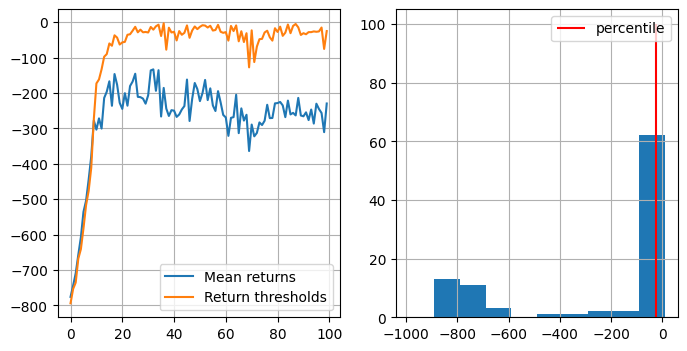

In [24]:
n_sessions = 100  # количество сессий для сэмплирования
percentile = 50  # перцентиль
learning_rate = 0.7 # то как быстро стратегия будет обновляться
# try 300 sessions, 60 percentile, 0.2 lr

log = []

for i in range(100):
    # генерируем n_sessions сессий
    ####### Здесь ваш код ########
    sessions = [generate_session(env, policy) for _ in range(n_sessions)]
    ##############################

    states_batch, actions_batch, returns_batch = zip(*sessions)
    # отбираем лучшие действия и состояния ###
    ####### Здесь ваш код ########
    elite_states, elite_actions = select_elites(
        states_batch, actions_batch, returns_batch, percentile
    )
    ##############################

    # обновляем стратегию
    ####### Здесь ваш код ########
    new_policy = update_policy(elite_states, elite_actions)
    ##############################

    policy = learning_rate * new_policy + (1 - learning_rate) * policy

    # выводим график с результатами
    show_progress(returns_batch, log, percentile)

### Посмотрим на результаты
Задача такси быстро сходится, начиная с отдачи -1000 к почти оптимальному значению, а потом опять падает до -50/-100. Это вызвано случайностью в самом окружении $-$ случайное начальное состояние пассажира и такси, в начале каждого эпизода.

В случае если алгоритм CEM не сможет научиться тому, как решить задачу из какого-то стартового положения, он просто отбросит этот эпизод, т.к. не будет сессий, которые переведут этот эпизод в топ лучших.

Для решения этой проблемы можно уменьшить threshold (порог лучших состояний) или изменить способ оценки стратегии, используя новую стратегию, полученную из каждого начального состояния и действия (теоретически правильный способ).

# Дополнительные материалы
1. [Reinforcement Learning Textbook](https://arxiv.org/pdf/2201.09746.pdf) by Sergey Ivanov
2. [Debugging RL, Without the Agonizing Pain](https://andyljones.com/posts/rl-debugging.html)